#### Academy
start-up de la EdTech, spécialisée dans les contenus de formation en ligne pour un public de niveau lycée et université
#### Objectif
**Indentifier les pays/régions les plus adaptés à une politique de développement commercial à l'international**
#### Mission
Réaliser une analyse pré-exploratoire à partir des jeux de données de la Banque Mondiale (l’organisme “EdStats All Indicator Query”) qui répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation afin de répondre aux questions stratégiques suivantes:
- Quels sont les pays avec un fort potentiel de clients ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?
- Quelles sont les indicateurs ou les variables permettant de quantifier le potentiel d'un pays/regions à une expansion internationnale?

#### Approche et démarche de l'analyse pré-exploratoire sur notre population cible
##### Définition de la popultion cible:
une population des 15-24 ans élevée au niveaux lycée et enseignements supérieurs, 
avec certains niveaux de revenus  
et un accès à internet inidspensable pour les formations, 
- Description, exploration et analyse de la forme des données
- Identifier des indicateurs et les variables les plus pertinents pour notre cible 


### 1. Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Récuperation des données CSV et stockage dans un DataFrame.

In [2]:
EdStCo_df = pd.read_csv('EdStatsCountry.csv')
EdStCoSe_df = pd.read_csv('EdStatsCountry-Series.csv')
EdStDa_df = pd.read_csv('EdStatsData.csv')
EdStFoNo_df = pd.read_csv('EdStatsFootNote.csv')
EdStSe_df = pd.read_csv('EdStatsSeries.csv')

#### Description et Analyse de la forme des jeux de données
##### Analyse de la forme du jeu de données

In [3]:
# informations(le type d'index et les colonnes, les valeurs non nulles) sur les DataFrame,avec la methode info() 

In [4]:
EdStCo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [5]:
EdStCoSe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [6]:
EdStDa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [7]:
EdStFoNo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [8]:
EdStSe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

Compréhension des ensembles de données :

- EdStCo_df: contient la liste de tous les pays présents dans les données (241 pays au total) - ainsi que d'autres caractéristiques spécifiques au pays, comme la région, le groupe de revenu spécifique au pays, etc.
[241 rows x 32 columns] 
- EdStCoSe_df: contient les indicateurs et les sources de données pour certains pays.  [613 rows x 4 columns]
- EdStDa_df:  - contient chaque pays, avec une liste d'indicateurs (3665 indicateurs uniques) ; contient la valeur mesurée pour chaque indicateur de 1970 à 2017 ; de 2020 à 2100 - contient des projections. [886930 rows x 70 columns]
- EdStFoNo_df: contient les estimations et les limites d'incertitude pour chaque année - il semble que certaines années manquent. [643638 rows x 5 columns]
- EdStSe_df - contient la liste de tous les indicateurs et la définition de chaque indicateur [3665 rows x 21 columns]]

##### Examinons maintenant les ensembles de données . 
Nous considérons le fichier csv EdStatsData = EdStDa_df comme le jeu de données principal, car il contient des informations pertinentes sur les indicateurs sur plusieurs années.

In [9]:
EdStDa_df.head(2)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                      Indicator Name Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F   NaN   

   1971  1972  1973  1974  1975  ...  2060  2065  2070  2075  2080  2085  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  

[2 rows x 70 columns]

In [10]:
EdStDa_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [11]:
# visualisons les données sur l'ensemble des années
Years = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']

In [12]:
EdStDa_df[Years].isna().sum()

1970    814642
1971    851393
1972    851311
1973    851385
1974    851200
         ...  
2080    835494
2085    835494
2090    835494
2095    835494
2100    835494
Length: 65, dtype: int64

<AxesSubplot:>

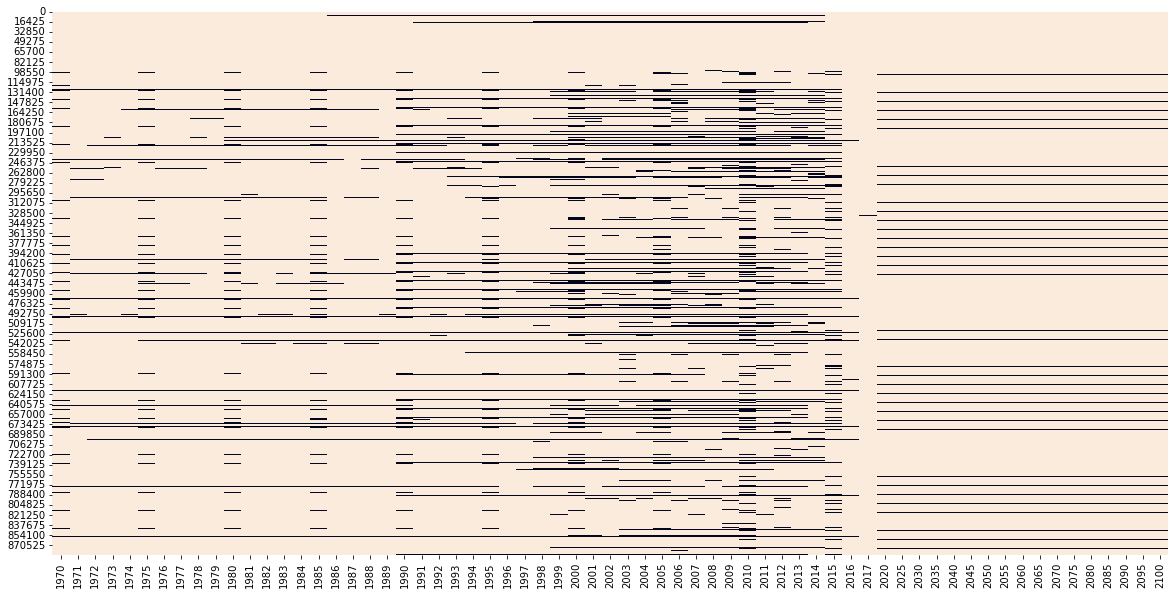

In [13]:
# nombres d'années avec des données
plt.figure(figsize=(20,10))
sns.heatmap(EdStDa_df[Years].isna(), cbar=False)

In [14]:
(EdStDa_df[Years].isna().sum()/EdStDa_df[Years].shape[0]).sort_values(ascending=True)

2010    0.726650
2005    0.792421
2000    0.800801
2012    0.833962
2011    0.835374
          ...   
1972    0.959840
1973    0.959924
1971    0.959933
2016    0.981442
2017    0.999839
Length: 65, dtype: float64

In [15]:
# nombres données par an
df_number_data_by_year = pd.DataFrame(EdStDa_df[Years].replace("", np.nan).count())
df_number_data_by_year.tail(10)

0
2055  51436
2060  51436
2065  51436
2070  51436
2075  51436
2080  51436
2085  51436
2090  51436
2095  51436
2100  51436

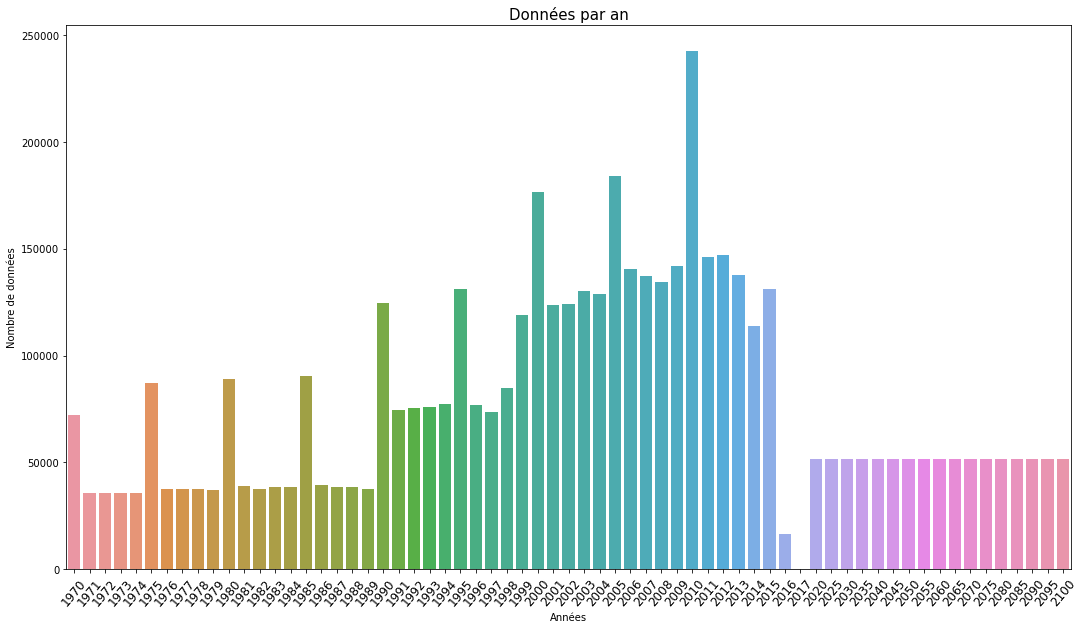

In [16]:
# Visualisation de données par an
plt.figure(figsize=(18, 10))
plt.title("Données par an", size=15)
plot = sns.barplot(y=df_number_data_by_year.iloc[:,0], x=df_number_data_by_year.index, data=df_number_data_by_year)
plot.set_xticklabels(labels=df_number_data_by_year.index, rotation=50, size=12)
plot.set(xlabel="Années", ylabel="Nombre de données")
plt.show()

In [17]:
# on supprimer les colonnes Country code Code et d'années dont nous n' aurons pas besoin pour la suite de notre analyse
EdStDa_df = EdStDa_df.drop(columns = [ '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
                                       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
                                       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
                                       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', 
                                       '2016', '2017', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075',
                                       '2080', '2085', '2090', '2095', '2100', 'Unnamed: 69'])

In [18]:
# ce qui permet de conserver la période de 2010 à 2015 et 2020 à 2035 pour une analye prédictive dans un premier temps
EdStDa_df.head(2)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                      Indicator Name Indicator Code  2010  \
0  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F   NaN   

   2011  2012  2013  2014  2015  2020  2025  2030  2035  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [19]:
EdStDa_df.shape

(886930, 14)

In [20]:
EdStDa_df['Indicator Name'].unique().shape

(3665,)

Nous avons plus de 3665 indicateurs. Nous en selectionnerons les plus permertinents.

In [21]:
EdStDa_df["Indicator Name"].unique().tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

Intéressons nous au indicateurs relatifs à notre  à la population cible, c'est à dire la population des 15-24  etudaints( lycées et Universités) avec un accès à internet, et des revenus.


In [22]:
Indicator = EdStDa_df[['Indicator Name','2010']].groupby('Indicator Name').count().sort_values(by='2010',ascending=False)

In [23]:
# les indicateurs les plus renseignés
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 3665)
Indicator.head(3665)

2010
Indicator Name                                          
Population, total                                    240
Population growth (annual %)                         240
GDP at market prices (current US$)                   228
GDP per capita (current US$)                         228
GDP at market prices (constant 2005 US$)             227
GDP per capita (constant 2005 US$)                   227
Internet users (per 100 people)                      227
Total outbound internationally mobile tertiary ...   222
Population of the official age for upper second...   220
Population, female                                   219
Population, ages 0-14 (% of total)                   219
Population of the official age for lower second...   219
Population, ages 0-14, female                        219
Population of the official age for secondary ed...   219
Population, ages 0-14, male                          219
Population of the official age for upper second...   219
Population, ages 0-14, total                         219
Population of the official age for upper second...   219
Population, male (% of total)                        219
Population, male                                     219
Population, ages 15-64, total                        219
Population, female (% of total)                      219
Population, ages 15-64, male                         219
Population, ages 15-64, female                       219
Population, ages 15-64 (% of total)                  219
Population of the official age for pre-primary ...   218
Population of the official age for secondary ed...   218
Population of the official age for secondary ed...   218
GNI (current US$)                                    218
Population of the official age for lower second...   218
Population of the official age for lower second...   218
Population of the official age for tertiary edu...   217
Mortality rate, under-5 (per 1,000)                  217
Population of the official age for pre-primary ...   217
Population of the official age for pre-primary ...   217
Population of the official age for tertiary edu...   216
Population of the official age for tertiary edu...   216
Population of the official entrance age to seco...   216
GDP per capita, PPP (current international $)        215
GDP, PPP (current international $)                   215
GDP, PPP (constant 2011 international $)             215
GNI per capita, Atlas method (current US$)           215
GDP per capita, PPP (constant 2011 internationa...   215
Population of the official entrance age to seco...   215
Population of the official entrance age to seco...   215
Population of the official age for primary educ...   214
Population of the official age for primary educ...   214
Population of the official age for primary educ...   214
Population of the official age for the last gra...   213
Population of the official age for the last gra...   213
Population of the official age for the last gra...   213
GNI per capita, PPP (current international $)        213
GNI, PPP (current international $)                   213
Population of the official entrance age to prim...   211
Labor force, female (% of total labor force)         211
Labor force, total                                   211
Unemployment, total (% of total labor force)         211
Unemployment, male (% of male labor force)           211
Unemployment, female (% of female labor force)       211
Population of the official entrance age to prim...   210
Population of the official entrance age to prim...   210
Gross outbound enrolment ratio, all regions, bo...   209
Theoretical duration of primary education (years)    208
Official entrance age to primary education (years)   208
Theoretical duration of lower secondary educati...   205
Theoretical duration of pre-primary education (...   205
Theoretical duration of secondary education (ye...   205
Official entrance age to lower secondary educat...   205
Theoretical duration of upper secondary educati...   205
Offic

Après analyse on remarque que nous avons 242 pays parmi lesquels les régions. il faudra donc 
- Ajouter les colonnes suivantes du jeu de données "EdStatsCountry.csv"
Code 2-alpha : Filtrer sur la base de la liste de pays telle que donnée dans l'ISO 3166-1
- Charger la liste des pays telle qu'elle est donnée dans l'ISO 3166-1 et les éléments de code ISO 3166-1-alpha-2 correspondants.
- Supprimer les lignes qui ne sont pas des pays sur la base de la liste des pays telle qu'elle est donnée dans la norme ISO 3166-1.

In [24]:
EdStDa_df_copy = EdStDa_df.dropna(axis="columns",how="all").dropna(axis="rows", how="all")

In [25]:
EdStDa_df_copy = EdStDa_df_copy.merge(right=EdStCo_df[["Country Code", "2-alpha code"]], on="Country Code", how="left")

In [26]:
EdStDa_df_copy

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code       2010          2011       2012      2013  \
0                 UIS.NERA.2        NaN           NaN        NaN       NaN   
1               UIS.NERA.2.F        NaN           NaN        NaN       NaN   
2             UIS.NERA.2.GPI        NaN           NaN        NaN       NaN   
3               UIS.NERA.2.M        NaN           NaN        NaN       NaN   
4                SE.PRM.TENR  85.211998      85.24514  86.101669  85.51194   
...                      ...        ...           ...        ...       ...   
886925      UIS.LP.AG15T24.M        NaN  166679.00000        NaN       NaN   
886926     SE.ADT.1524.LT.ZS        NaN      90.93070        NaN       NaN   
886927  SE.ADT.1524.LT.FE.ZS        NaN      92.12456        NaN       NaN   
886928  SE.ADT.1524.LT.FM.ZS        NaN       1.02828        NaN       NaN   
886929  SE.ADT.1524.LT.MA.ZS        NaN      89.59058        NaN       NaN   

                 2014  2015  2020  2025  2030  2035 2-alpha code  
0                 NaN   NaN   NaN   NaN   NaN   NaN           1A  
1                 NaN   NaN   NaN   NaN   NaN   NaN           1A  
2                 NaN   NaN   NaN   NaN   NaN   NaN           1A  
3                 NaN   NaN   NaN   NaN   NaN   NaN           1A  
4           85.320152   NaN   NaN   NaN   NaN   NaN           1A  
...               ...   ...   ...   ...   ...   ...          ...  
886925  199464.000000   NaN   NaN   NaN   NaN   NaN           ZW  
886926      90.428120   NaN   NaN   NaN   NaN   NaN           ZW  
886927      93.188350   NaN   NaN   NaN   NaN   NaN           ZW  
886928       1.063890   NaN   NaN   NaN   NaN   NaN           ZW  
886929      87.591860   NaN   NaN   NaN   NaN   NaN           ZW  

[886930 rows x 15 columns]

In [27]:
print(", ".join(map(repr, EdStDa_df_copy.columns.tolist())))

'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015', '2020', '2025', '2030', '2035', '2-alpha code'


In [28]:
ORDERING = ['Country Name', 'Indicator Name', '2-alpha code','Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015', '2020', '2025', '2030', '2035']

In [29]:
EdStDa_df_copy = EdStDa_df_copy[ORDERING]

In [30]:
EdStDa_df_copy

Country Name                                     Indicator Name  \
0        Arab World  Adjusted net enrolment rate, lower secondary, ...   
1        Arab World  Adjusted net enrolment rate, lower secondary, ...   
2        Arab World  Adjusted net enrolment rate, lower secondary, ...   
3        Arab World  Adjusted net enrolment rate, lower secondary, ...   
4        Arab World  Adjusted net enrolment rate, primary, both sex...   
...             ...                                                ...   
886925     Zimbabwe  Youth illiterate population, 15-24 years, male...   
886926     Zimbabwe  Youth literacy rate, population 15-24 years, b...   
886927     Zimbabwe  Youth literacy rate, population 15-24 years, f...   
886928     Zimbabwe  Youth literacy rate, population 15-24 years, g...   
886929     Zimbabwe  Youth literacy rate, population 15-24 years, m...   

       2-alpha code        Indicator Code       2010          2011       2012  \
0                1A            UIS.NERA.2        NaN           NaN        NaN   
1                1A          UIS.NERA.2.F        NaN           NaN        NaN   
2                1A        UIS.NERA.2.GPI        NaN           NaN        NaN   
3                1A          UIS.NERA.2.M        NaN           NaN        NaN   
4                1A           SE.PRM.TENR  85.211998      85.24514  86.101669   
...             ...                   ...        ...           ...        ...   
886925           ZW      UIS.LP.AG15T24.M        NaN  166679.00000        NaN   
886926           ZW     SE.ADT.1524.LT.ZS        NaN      90.93070        NaN   
886927           ZW  SE.ADT.1524.LT.FE.ZS        NaN      92.12456        NaN   
886928           ZW  SE.ADT.1524.LT.FM.ZS        NaN       1.02828        NaN   
886929           ZW  SE.ADT.1524.LT.MA.ZS        NaN      89.59058        NaN   

            2013           2014  2015  2020  2025  2030  2035  
0            NaN            NaN   NaN   NaN   NaN   NaN   NaN  
1            NaN            NaN   NaN   NaN   NaN   NaN   NaN  
2            NaN            NaN   NaN   NaN   NaN   NaN   NaN  
3            NaN            NaN   NaN   NaN   NaN   NaN   NaN  
4       85.51194      85.320152   NaN   NaN   NaN   NaN   NaN  
...          ...            ...   ...   ...   ...   ...   ...  
886925       NaN  199464.000000   NaN   NaN   NaN   NaN   NaN  
886926       NaN      90.428120   NaN   NaN   NaN   NaN   NaN  
886927       NaN      93.188350   NaN   NaN   NaN   NaN   NaN  
886928       NaN       1.063890   NaN   NaN   NaN   NaN   NaN  
886929       NaN      87.591860   NaN   NaN   NaN   NaN   NaN  

[886930 rows x 14 columns]

Liste des pays tels qu'indiqués dans la norme ISO 3166-1 et les codets correspondants de la norme ISO 3166-1-alpha-2 pour supprimer les lignes qui ne sont pas des pays.

In [31]:
IsoCount_df = pd.read_csv("country-codes_csv.csv", sep=",", keep_default_na=False, encoding="utf-8")

In [32]:
IsoCount_df

FIFA               Dial ISO3166-1-Alpha-3            MARC  \
0                TPE                886               TWN              ch   
1                AFG                 93               AFG              af   
2                ALB                355               ALB              aa   
3                ALG                213               DZA              ae   
4                ASA              1-684               ASM              as   
5                AND                376               AND              an   
6                ANG                244               AGO              ao   
7                AIA              1-264               AIA              am   
8                ROS                672               ATA              ay   
9                ATG              1-268               ATG              aq   
10               ARG                 54               ARG              ag   
11               ARM                374               ARM              ai   
12               ARU                297               ABW              aw   
13               AUS                 61               AUS              at   
14               AUT                 43               AUT              au   
15               AZE                994               AZE              aj   
16               BAH              1-242               BHS              bf   
17               BHR                973               BHR              ba   
18               BAN                880               BGD              bg   
19               BRB              1-246               BRB              bb   
20               BLR                375               BLR              bw   
21               BEL                 32               BEL              be   
22               BLZ                501               BLZ              bh   
23               BEN                229               BEN              dm   
24               BER              1-441               BMU              bm   
25               BHU                975               BTN              bt   
26               BOL                591               BOL              bo   
27               ANT                599               BES              ca   
28               BIH                387               BIH              bn   
29               BOT                267               BWA              bs   
30                                   47               BVT              bv   
31               BRA                 55               BRA              bl   
32                                  246               IOT              bi   
33               VGB              1-284               VGB              vb   
34               BRU                673               BRN              bx   
35               BUL                359               BGR              bu   
36               BFA                226               BFA              uv   
37               BDI                257               BDI              bd   
38               CPV                238               CPV              cv   
39               CAM                855               KHM              cb   
40               CMR                237               CMR              cm   
41               CAN                  1               CAN             xxc   
42               CAY              1-345               CYM              cj   
43               CTA                236               CAF              cx   
44               CHA                235               TCD              cd   
45               CHI                 56               CHL              cl   
46               CHN                 86               CHN              cc   
47               HKG                852               HKG                   
48               MAC                853               MAC                   
49               CXR                 61               CXR              xa   
50               CCK                 61               CCK              xb   
51          

Lignes à supprimer sur la base de la liste des pays telle qu'elle figure dans la norme ISO 3166-1.

In [33]:
# Filtrer selon les normes iso
EdStDa_df_copy = EdStDa_df_copy[EdStDa_df_copy["2-alpha code"].isin(IsoCount_df["ISO3166-1-Alpha-2"])]
EdStDa_df_copy.head(10)

Country Name                                     Indicator Name  \
91625  Afghanistan  Adjusted net enrolment rate, lower secondary, ...   
91626  Afghanistan  Adjusted net enrolment rate, lower secondary, ...   
91627  Afghanistan  Adjusted net enrolment rate, lower secondary, ...   
91628  Afghanistan  Adjusted net enrolment rate, lower secondary, ...   
91629  Afghanistan  Adjusted net enrolment rate, primary, both sex...   
91630  Afghanistan   Adjusted net enrolment rate, primary, female (%)   
91631  Afghanistan  Adjusted net enrolment rate, primary, gender p...   
91632  Afghanistan     Adjusted net enrolment rate, primary, male (%)   
91633  Afghanistan  Adjusted net enrolment rate, upper secondary, ...   
91634  Afghanistan  Adjusted net enrolment rate, upper secondary, ...   

      2-alpha code  Indicator Code  2010  2011  2012       2013       2014  \
91625           AF      UIS.NERA.2   NaN   NaN   NaN  47.436790  50.627232   
91626           AF    UIS.NERA.2.F   NaN   NaN   NaN  34.073261  37.641541   
91627           AF  UIS.NERA.2.GPI   NaN   NaN   NaN   0.567060   0.598370   
91628           AF    UIS.NERA.2.M   NaN   NaN   NaN  60.087059  62.906952   
91629           AF     SE.PRM.TENR   NaN   NaN   NaN        NaN        NaN   
91630           AF  SE.PRM.TENR.FE   NaN   NaN   NaN        NaN        NaN   
91631           AF  UIS.NERA.1.GPI   NaN   NaN   NaN        NaN        NaN   
91632           AF  SE.PRM.TENR.MA   NaN   NaN   NaN        NaN        NaN   
91633           AF      UIS.NERA.3   NaN   NaN   NaN  31.332621  32.417030   
91634           AF    UIS.NERA.3.F   NaN   NaN   NaN  21.745621  22.788639   

       2015  2020  2025  2030  2035  
91625   NaN   NaN   NaN   NaN   NaN  
91626   NaN   NaN   NaN   NaN   NaN  
91627   NaN   NaN   NaN   NaN   NaN  
91628   NaN   NaN   NaN   NaN   NaN  
91629   NaN   NaN   NaN   NaN   NaN  
91630   NaN   NaN   NaN   NaN   NaN  
91631   NaN   NaN   NaN   NaN   NaN  
91632   NaN   NaN   NaN   NaN   NaN  
91633   NaN   NaN   NaN   NaN   NaN  
91634   NaN   NaN   NaN   NaN   NaN

In [34]:
EdStDa_df_copy.shape

(780645, 14)

In [35]:
indicators_df = pd.DataFrame(EdStDa_df_copy[["Indicator Name", "Indicator Code"]])

In [36]:
indicators_df

Indicator Name  \
91625   Adjusted net enrolment rate, lower secondary, ...   
91626   Adjusted net enrolment rate, lower secondary, ...   
91627   Adjusted net enrolment rate, lower secondary, ...   
91628   Adjusted net enrolment rate, lower secondary, ...   
91629   Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code  
91625             UIS.NERA.2  
91626           UIS.NERA.2.F  
91627         UIS.NERA.2.GPI  
91628           UIS.NERA.2.M  
91629            SE.PRM.TENR  
...                      ...  
886925      UIS.LP.AG15T24.M  
886926     SE.ADT.1524.LT.ZS  
886927  SE.ADT.1524.LT.FE.ZS  
886928  SE.ADT.1524.LT.FM.ZS  
886929  SE.ADT.1524.LT.MA.ZS  

[780645 rows x 2 columns]

In [37]:
 # supprimer les duplications 
indicators_df.drop_duplicates(subset="Indicator Name", keep="first", inplace=True)

In [38]:
indicators_df.shape

(3665, 2)

In [39]:
# List of keywords to extract the initial indicators based on keywords related to the indicators to measure
KEYWORDS_INDICATORS = ("internet", "computer", "population", "education", "secondary", "university", "college", "tertiaire", "bachelor", "financing", "funding", "income", "capita", "GDP"
)

In [40]:
# Extracting the initial indicators based on keywords related to the indicators to measure
indicators_df = pd.DataFrame(indicators_df[indicators_df["Indicator Name"].str.contains("|".join(KEYWORDS_INDICATORS), case=False, na=False).any(level=0)])

C:\Users\Serge Alain\AppData\Local\Temp\ipykernel_16160\239030136.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.any(level=1) should use df.groupby(level=1).any()
  indicators_df = pd.DataFrame(indicators_df[indicators_df["Indicator Name"].str.contains("|".join(KEYWORDS_INDICATORS), case=False, na=False).any(level=0)])


In [41]:
# Nombres d'indicateurs selons les mots clés
indicators_df["Indicator Name"].nunique()

1958

In [42]:
indicators_df

Indicator Name  \
91625  Adjusted net enrolment rate, lower secondary, ...   
91626  Adjusted net enrolment rate, lower secondary, ...   
91627  Adjusted net enrolment rate, lower secondary, ...   
91628  Adjusted net enrolment rate, lower secondary, ...   
91633  Adjusted net enrolment rate, upper secondary, ...   
91634  Adjusted net enrolment rate, upper secondary, ...   
91635  Adjusted net enrolment rate, upper secondary, ...   
91636  Adjusted net enrolment rate, upper secondary, ...   
91637  Adjusted net intake rate to Grade 1 of primary...   
91638  Adjusted net intake rate to Grade 1 of primary...   
91639  Adjusted net intake rate to Grade 1 of primary...   
91640  Adjusted net intake rate to Grade 1 of primary...   
91641   Adult illiterate population, 15+ years, % female   
91642  Adult illiterate population, 15+ years, both s...   
91643  Adult illiterate population, 15+ years, female...   
91644  Adult illiterate population, 15+ years, male (...   
91645  Adult literacy rate, population 15+ years, bot...   
91646  Adult literacy rate, population 15+ years, fem...   
91647  Adult literacy rate, population 15+ years, gen...   
91648  Adult literacy rate, population 15+ years, mal...   
91650  Africa Dataset: Average number of pupils per m...   
91651  Africa Dataset: Average number of pupils per m...   
91652  Africa Dataset: Average number of pupils per m...   
91653  Africa Dataset: Average number of pupils per m...   
91654  Africa Dataset: Average number of pupils per m...   
91655  Africa Dataset: Average number of pupils per m...   
91656  Africa Dataset: Average number of pupils per m...   
91657  Africa Dataset: Average number of pupils per m...   
91658  Africa Dataset: Average number of pupils per r...   
91659  Africa Dataset: Average number of pupils per r...   
91660  Africa Dataset: Average number of pupils per r...   
91661  Africa Dataset: Average number of pupils per r...   
91662  Africa Dataset: Average number of pupils per r...   
91663  Africa Dataset: Average number of pupils per r...   
91664  Africa Dataset: Average number of pupils per r...   
91665  Africa Dataset: Average number of pupils per r...   
91676  Africa Dataset: Graduates from accredited pre-...   
91677  Africa Dataset: Graduates from accredited pre-...   
91678  Africa Dataset: Graduates from accredited pre-...   
91679  Africa Dataset: Graduates from accredited pre-...   
91684  Africa Dataset: Graduates from accredited pre-...   
91685  Africa Dataset: Graduates from accredited pre-...   
91686  Africa Dataset: Percentage of female newly rec...   
91687  Africa Dataset: Percentage of female newly rec...   
91688  Africa Dataset: Percentage of female newly rec...   
91689  Africa Dataset: Percentage of female teachers ...   
91690  Africa Dataset: Percentage of female teachers ...   
91691  Africa Dataset: Percentage of female teachers ...   
91692  Africa Dataset: Percentage of lower secondary ...   
91693  Africa Dataset: Percentage of lower secondary ...   
91694  Africa Dataset: Percentage of lower secondary ...   
91695  Africa Dataset: Percentage of lower secondary ...   
91696  Africa Dataset: Percentage of lower secondary ...   
91697  Africa Dataset: Percentage of lower secondary ...   
91698  Africa Dataset: Percentage of lower secondary ...   
91699  Africa Dataset: Percentage of lower secondary ...   
91700  Africa Dataset: Percentage of lower secondary ...   
91701  Africa Dataset: Percentage of lower secondary ...   
91702  Africa Dataset: Percentage of lower secondary ...   
91703  Africa Dataset: Percentage of male newly recru...   
91704  Africa Dataset: Percentage of male newly recru...   
91705  Africa Dataset: Percentage of male newly recru...   
91706  Africa Dataset: Percentage of male teachers in...   
91707  Africa Dataset: Percentage of male teachers in...   
91708  Africa Dataset: Percentage of male teachers in...   
91709  Africa Dataset: Percentage of newly recruited ...   
91710  Africa Dataset:

In [43]:
# Extraction de la liste des indicateurs selon les mots clés
KEYWORDS_NOT_INDICATORS = (
 "50", "54", "55", "59", "60", "64", "65", "70", "75", "74", "80", "No Education", "Primary", "out-of-school", "years of schooling", "Average years of", 
    "Repeaters", "Repetition rate", "performance", "completion rate", "School life expectancy", "attendance rate", "Drop-out", "duration", "Labor force", 
    "teacher", "Government", "Policy", "expenditure", "illiterate population", "female", "male", "childhood", "toilets", "potable water", "electricity", 
    "single-sex toilets"    
)

In [44]:
indicators_df = pd.DataFrame(indicators_df[~indicators_df["Indicator Name"].str.contains("|".join(KEYWORDS_NOT_INDICATORS), case=False, na=False).any(level=0)])

C:\Users\Serge Alain\AppData\Local\Temp\ipykernel_16160\3237564356.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.any(level=1) should use df.groupby(level=1).any()
  indicators_df = pd.DataFrame(indicators_df[~indicators_df["Indicator Name"].str.contains("|".join(KEYWORDS_NOT_INDICATORS), case=False, na=False).any(level=0)])


In [45]:
# Nombres d'indicateurs dans "indicators_df" sur des mots-clés liés aux indicateurs à mesurer
indicators_df["Indicator Name"].nunique()

296

In [46]:
indicators_df

Indicator Name  \
91625  Adjusted net enrolment rate, lower secondary, ...   
91627  Adjusted net enrolment rate, lower secondary, ...   
91633  Adjusted net enrolment rate, upper secondary, ...   
91635  Adjusted net enrolment rate, upper secondary, ...   
91645  Adult literacy rate, population 15+ years, bot...   
91647  Adult literacy rate, population 15+ years, gen...   
91740  Africa Dataset: School census return rate from...   
92002  Barro-Lee: Percentage of population age 15+ wi...   
92003  Barro-Lee: Percentage of population age 15+ wi...   
92004  Barro-Lee: Percentage of population age 15+ wi...   
92005  Barro-Lee: Percentage of population age 15+ wi...   
92009  Barro-Lee: Percentage of population age 15-19 ...   
92010  Barro-Lee: Percentage of population age 15-19 ...   
92011  Barro-Lee: Percentage of population age 15-19 ...   
92012  Barro-Lee: Percentage of population age 15-19 ...   
92016  Barro-Lee: Percentage of population age 20-24 ...   
92017  Barro-Lee: Percentage of population age 20-24 ...   
92018  Barro-Lee: Percentage of population age 20-24 ...   
92019  Barro-Lee: Percentage of population age 20-24 ...   
92023  Barro-Lee: Percentage of population age 25+ wi...   
92024  Barro-Lee: Percentage of population age 25+ wi...   
92025  Barro-Lee: Percentage of population age 25+ wi...   
92026  Barro-Lee: Percentage of population age 25+ wi...   
92030  Barro-Lee: Percentage of population age 25-29 ...   
92031  Barro-Lee: Percentage of population age 25-29 ...   
92032  Barro-Lee: Percentage of population age 25-29 ...   
92033  Barro-Lee: Percentage of population age 25-29 ...   
92037  Barro-Lee: Percentage of population age 30-34 ...   
92038  Barro-Lee: Percentage of population age 30-34 ...   
92039  Barro-Lee: Percentage of population age 30-34 ...   
92040  Barro-Lee: Percentage of population age 30-34 ...   
92044  Barro-Lee: Percentage of population age 35-39 ...   
92045  Barro-Lee: Percentage of population age 35-39 ...   
92046  Barro-Lee: Percentage of population age 35-39 ...   
92047  Barro-Lee: Percentage of population age 35-39 ...   
92051  Barro-Lee: Percentage of population age 40-44 ...   
92052  Barro-Lee: Percentage of population age 40-44 ...   
92053  Barro-Lee: Percentage of population age 40-44 ...   
92054  Barro-Lee: Percentage of population age 40-44 ...   
92058  Barro-Lee: Percentage of population age 45-49 ...   
92059  Barro-Lee: Percentage of population age 45-49 ...   
92060  Barro-Lee: Percentage of population age 45-49 ...   
92061  Barro-Lee: Percentage of population age 45-49 ...   
92105  Barro-Lee: Population in thousands, age 15+, t...   
92107  Barro-Lee: Population in thousands, age 15-19,...   
92109  Barro-Lee: Population in thousands, age 20-24,...   
92111  Barro-Lee: Population in thousands, age 25+, t...   
92113  Barro-Lee: Population in thousands, age 25-29,...   
92115  Barro-Lee: Population in thousands, age 30-34,...   
92117  Barro-Lee: Population in thousands, age 35-39,...   
92119  Barro-Lee: Population in thousands, age 40-44,...   
92121  Barro-Lee: Population in thousands, age 45-49,...   
92758  Enrolment in Grade 1 of lower secondary genera...   
92762  Enrolment in Grade 2 of lower secondary genera...   
92766  Enrolment in Grade 3 of lower secondary genera...   
92770  Enrolment in Grade 4 of lower secondary genera...   
92774  Enrolment in Grade 5 of lower secondary genera...   
92778  Enrolment in Grade 6 of lower secondary genera...   
92784  Enrolment in lower secondary education, both s...   
92786  Enrolment in lower secondary education, privat...   
92788  Enrolment in lower secondary education, public...   
92790  Enrolment in lower secondary general education...   
92792  Enrolment in lower secondary general, both sex...   
92794  Enrolment in lower secondary vocational, both ...   
92796  Enrolment in post-secondary non-tertiary educa...   
92798  Enrolment in post-secondary non-tertiary educa...   
92800  Enrolment in po

In [47]:
indicators_df.shape

(296, 2)

Après avoir analysé la liste des indicateurs, j'ai décidé de sélectionner comme indicateurs la liste appelée INDICATORS.
Dans cette liste, j'ai décidé d'exclure certains indicateurs car des indicateurs similaires sont déjà inclus.
Ci-dessous, la liste des indicateurs non inclus.

- SP.POP.1524.TO.UN - Population des 15 - 24 
- NY.GNP.PCAP.PP.CD - GNI per capita, PPP (current international $)
- SE.SEC.ENRL.GC - Effectif dans le secondaire général, deux sexes (nombre)
- SP.POP.GROW - Croissance de la population (% annuel)
- UIS.E.4 - Effectifs dans l'enseignement post-secondaire non tertiaire, les deux sexes (nombre)

In [48]:
INDICATORS =[
    "SP.POP.TOTL", "SP.POP.1524.TO.UN", "IT.NET.USER.P2", "UIS.E.3", "SE.TER.ENRL", "NY.GDP.PCAP.PP.CD"]


In [49]:
indicators_df = pd.DataFrame(indicators_df.loc[indicators_df["Indicator Code"].isin(INDICATORS)])
pd.set_option("display.max_columns", None)
indicators_df

Indicator Name     Indicator Code
92829  Enrolment in tertiary education, all programme...        SE.TER.ENRL
92839  Enrolment in upper secondary education, both s...            UIS.E.3
92872      GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD
93000                    Internet users (per 100 people)     IT.NET.USER.P2
94107                      Population, ages 15-24, total  SP.POP.1524.TO.UN
94158                                  Population, total        SP.POP.TOTL

In [50]:
RENAMED_INDICATORS = [
    "Total population", "Ages 15-24 population", "Internet users", "Enrolment in upper secondary education", "Enrolment in tertiary education", "Gross domestic product per capita", 
]

In [51]:
df_indicator_rename_indicator = pd.DataFrame({
    "Indicator Code" : INDICATORS,
    "Renamed Indicator" : RENAMED_INDICATORS
})

In [52]:
indicators_df = indicators_df.merge(right=df_indicator_rename_indicator[["Indicator Code", "Renamed Indicator"]], on="Indicator Code", how="left")

In [53]:
indicators_df

Indicator Name     Indicator Code  \
0  Enrolment in tertiary education, all programme...        SE.TER.ENRL   
1  Enrolment in upper secondary education, both s...            UIS.E.3   
2      GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
3                    Internet users (per 100 people)     IT.NET.USER.P2   
4                      Population, ages 15-24, total  SP.POP.1524.TO.UN   
5                                  Population, total        SP.POP.TOTL   

                        Renamed Indicator  
0         Enrolment in tertiary education  
1  Enrolment in upper secondary education  
2       Gross domestic product per capita  
3                          Internet users  
4                   Ages 15-24 population  
5                        Total population

In [54]:
# reset width of showing cols
pd.reset_option("display.max_colwidth")

In [55]:
# Getting the sample of data of "df_data_copy" based on the initial list of indicators
df_Data_final = pd.DataFrame(EdStDa_df_copy.loc[EdStDa_df_copy["Indicator Code"].isin(list(indicators_df["Indicator Code"]))])

In [56]:
df_Data_final

Country Name  \
92829                      Afghanistan   
92839                      Afghanistan   
92872                      Afghanistan   
93000                      Afghanistan   
94107                      Afghanistan   
94158                      Afghanistan   
96494                          Albania   
96504                          Albania   
96537                          Albania   
96665                          Albania   
97772                          Albania   
97823                          Albania   
100159                         Algeria   
100169                         Algeria   
100202                         Algeria   
100330                         Algeria   
101437                         Algeria   
101488                         Algeria   
103824                  American Samoa   
103834                  American Samoa   
103867                  American Samoa   
103995                  American Samoa   
105102                  American Samoa   
105153                  American Samoa   
107489                         Andorra   
107499                         Andorra   
107532                         Andorra   
107660                         Andorra   
108767                         Andorra   
108818                         Andorra   
111154                          Angola   
111164                          Angola   
111197                          Angola   
111325                          Angola   
112432                          Angola   
112483                          Angola   
114819             Antigua and Barbuda   
114829             Antigua and Barbuda   
114862             Antigua and Barbuda   
114990             Antigua and Barbuda   
116097             Antigua and Barbuda   
116148             Antigua and Barbuda   
118484                       Argentina   
118494                       Argentina   
118527                       Argentina   
118655                       Argentina   
119762                       Argentina   
119813                       Argentina   
122149                         Armenia   
122159                         Armenia   
122192                         Armenia   
122320                         Armenia   
123427                         Armenia   
123478                         Armenia   
125814                           Aruba   
125824                           Aruba   
125857                           Aruba   
125985                           Aruba   
127092                           Aruba   
127143                           Aruba   
129479                       Australia   
129489                       Australia   
129522                       Australia   
129650                       Australia   
130757                       Australia   
130808                       Australia   
133144                         Austria   
133154                         Austria   
133187                         Austria   
133315                         Austria   
134422                         Austria   
134473                         Austria   
136809                      Azerbaijan   
136819                      Azerbaijan   
136852                      Azerbaijan   
136980                      Azerbaijan   
138087                      Azerbaijan   
138138                      Azerbaijan   
140474                    Bahamas, The   
140484                    Bahamas, The   
140517                    Bahamas, The   
140645                    Bahamas, The   
141752                    Bahamas, The   
141803                    Bahamas, The   
144139                         Bahrain   
144149                         Bahrain   
144182                         Bahrain   
144310                         Bahrain   
145417                         Bahrain   
145468                         Bahrain   
147804                      Bangladesh   
147814                      Bangladesh   
147847                      Bangladesh   
147975                      Bangladesh   
149082                      Banglade

In [57]:
df_Data_final = df_Data_final.merge(right=indicators_df[["Indicator Code", "Renamed Indicator"]], on="Indicator Code", how="left")

In [58]:
df_Data_final.shape

(1278, 15)

Pour sélectionner les pays, je vais suivre les étapes suivantes

Nettoyer les colonnes et les lignes NaN dans les ensembles de données df_sample.
Sélectionner les colonnes minimales nécessaires pour travailler
Préparer le jeu de données pour travailler dessus afin de sélectionner les pays
Sélectionner les données les plus récentes pour chaque pays par indicateurs
Eliminer les pays dont la population est inférieure à 10 M



In [59]:
# Suppression des colonnes et lignes NaN pour travailler avec le dataframe
df_Data_final_copy = df_Data_final.dropna(axis="columns", how="all").dropna(axis="rows", how="all")

In [60]:
df_Data_final_copy

Country Name  \
0                        Afghanistan   
1                        Afghanistan   
2                        Afghanistan   
3                        Afghanistan   
4                        Afghanistan   
5                        Afghanistan   
6                            Albania   
7                            Albania   
8                            Albania   
9                            Albania   
10                           Albania   
11                           Albania   
12                           Algeria   
13                           Algeria   
14                           Algeria   
15                           Algeria   
16                           Algeria   
17                           Algeria   
18                    American Samoa   
19                    American Samoa   
20                    American Samoa   
21                    American Samoa   
22                    American Samoa   
23                    American Samoa   
24                           Andorra   
25                           Andorra   
26                           Andorra   
27                           Andorra   
28                           Andorra   
29                           Andorra   
30                            Angola   
31                            Angola   
32                            Angola   
33                            Angola   
34                            Angola   
35                            Angola   
36               Antigua and Barbuda   
37               Antigua and Barbuda   
38               Antigua and Barbuda   
39               Antigua and Barbuda   
40               Antigua and Barbuda   
41               Antigua and Barbuda   
42                         Argentina   
43                         Argentina   
44                         Argentina   
45                         Argentina   
46                         Argentina   
47                         Argentina   
48                           Armenia   
49                           Armenia   
50                           Armenia   
51                           Armenia   
52                           Armenia   
53                           Armenia   
54                             Aruba   
55                             Aruba   
56                             Aruba   
57                             Aruba   
58                             Aruba   
59                             Aruba   
60                         Australia   
61                         Australia   
62                         Australia   
63                         Australia   
64                         Australia   
65                         Australia   
66                           Austria   
67                           Austria   
68                           Austria   
69                           Austria   
70                           Austria   
71                           Austria   
72                        Azerbaijan   
73                        Azerbaijan   
74                        Azerbaijan   
75                        Azerbaijan   
76                        Azerbaijan   
77                        Azerbaijan   
78                      Bahamas, The   
79                      Bahamas, The   
80                      Bahamas, The   
81                      Bahamas, The   
82                      Bahamas, The   
83                      Bahamas, The   
84                           Bahrain   
85                           Bahrain   
86                           Bahrain   
87                           Bahrain   
88                           Bahrain   
89                           Bahrain   
90                        Bangladesh   
91                        Bangladesh   
92                        Bangladesh   
93                        Bangladesh   
94                        Bangladesh   
95                        Bangladesh   
96                          Barbados   
97                          Barbados   
98                          Barbados   
99                      

In [61]:
Years_Work = ["2010", "2011", "2012", "2013", "2014", "2015"]

In [62]:
Columns_Work = ["Country Name", "Renamed Indicator"] + Years_Work

In [63]:
Data_df = df_Data_final_copy[Columns_Work]

In [64]:
Data_df

Country Name                       Renamed Indicator  \
0                        Afghanistan         Enrolment in tertiary education   
1                        Afghanistan  Enrolment in upper secondary education   
2                        Afghanistan       Gross domestic product per capita   
3                        Afghanistan                          Internet users   
4                        Afghanistan                   Ages 15-24 population   
5                        Afghanistan                        Total population   
6                            Albania         Enrolment in tertiary education   
7                            Albania  Enrolment in upper secondary education   
8                            Albania       Gross domestic product per capita   
9                            Albania                          Internet users   
10                           Albania                   Ages 15-24 population   
11                           Albania                        Total population   
12                           Algeria         Enrolment in tertiary education   
13                           Algeria  Enrolment in upper secondary education   
14                           Algeria       Gross domestic product per capita   
15                           Algeria                          Internet users   
16                           Algeria                   Ages 15-24 population   
17                           Algeria                        Total population   
18                    American Samoa         Enrolment in tertiary education   
19                    American Samoa  Enrolment in upper secondary education   
20                    American Samoa       Gross domestic product per capita   
21                    American Samoa                          Internet users   
22                    American Samoa                   Ages 15-24 population   
23                    American Samoa                        Total population   
24                           Andorra         Enrolment in tertiary education   
25                           Andorra  Enrolment in upper secondary education   
26                           Andorra       Gross domestic product per capita   
27                           Andorra                          Internet users   
28                           Andorra                   Ages 15-24 population   
29                           Andorra                        Total population   
30                            Angola         Enrolment in tertiary education   
31                            Angola  Enrolment in upper secondary education   
32                            Angola       Gross domestic product per capita   
33                            Angola                          Internet users   
34                            Angola                   Ages 15-24 population   
35                            Angola                        Total population   
36               Antigua and Barbuda         Enrolment in tertiary education   
37               Antigua and Barbuda  Enrolment in upper secondary education   
38               Antigua and Barbuda       Gross domestic product per capita   
39               Antigua and Barbuda                          Internet users   
40               Antigua and Barbuda                   Ages 15-24 population   
41               Antigua and Barbuda                        Total population   
42                         Argentina         Enrolment in tertiary education   
43                         Argentina  Enrolment in upper secondary education   
44                         Argentina       Gross domestic product per capita   
45                         Argentina                          Internet users   
46                         Argentina                   Ages 15-24 population   
47                         Argentina                        Total population   
48                           Armenia         Enrolment in tertiary education   
49                      

In [65]:
# Preaparing the data to work on it
Data_df = Data_df.melt(["Country Name", "Renamed Indicator"], var_name="Years_Work", value_name="Value").sort_values(by=["Country Name", "Years_Work", "Renamed Indicator"])

la préparation du jeu de données.

- pivoter le cadre de données du format large au format long.
- transformer les indicateurs en plusieurs colonnes, une colonne pour chacun d'entre eux.
- Sélectionner la valeur la plus récente par année pour chaque pays en considérant les multiples indicateurs.
- Description l'ensemble de données.

In [66]:
Data_df

Country Name                       Renamed Indicator Years_Work  \
4     Afghanistan                   Ages 15-24 population       2010   
0     Afghanistan         Enrolment in tertiary education       2010   
1     Afghanistan  Enrolment in upper secondary education       2010   
2     Afghanistan       Gross domestic product per capita       2010   
3     Afghanistan                          Internet users       2010   
...           ...                                     ...        ...   
7662     Zimbabwe         Enrolment in tertiary education       2015   
7663     Zimbabwe  Enrolment in upper secondary education       2015   
7664     Zimbabwe       Gross domestic product per capita       2015   
7665     Zimbabwe                          Internet users       2015   
7667     Zimbabwe                        Total population       2015   

             Value  
4     6.090239e+06  
0              NaN  
1     5.673440e+05  
2     1.581601e+03  
3     4.000000e+00  
...            ...  
7662  1.355750e+05  
7663           NaN  
7664  2.040272e+03  
7665  2.274282e+01  
7667  1.577745e+07  

[7668 rows x 4 columns]

In [67]:
Data_df = Data_df.pivot_table("Value", ["Country Name", "Years_Work"], "Renamed Indicator")

In [68]:
Data_df  = pd.DataFrame(Data_df).reset_index()

In [69]:
Data_df 

Renamed Indicator                    Country Name Years_Work  \
0                                     Afghanistan       2010   
1                                     Afghanistan       2011   
2                                     Afghanistan       2012   
3                                     Afghanistan       2013   
4                                     Afghanistan       2014   
5                                     Afghanistan       2015   
6                                         Albania       2010   
7                                         Albania       2011   
8                                         Albania       2012   
9                                         Albania       2013   
10                                        Albania       2014   
11                                        Albania       2015   
12                                        Algeria       2010   
13                                        Algeria       2011   
14                                        Algeria       2012   
15                                        Algeria       2013   
16                                        Algeria       2014   
17                                        Algeria       2015   
18                                 American Samoa       2010   
19                                 American Samoa       2011   
20                                 American Samoa       2012   
21                                 American Samoa       2013   
22                                 American Samoa       2014   
23                                 American Samoa       2015   
24                                        Andorra       2010   
25                                        Andorra       2011   
26                                        Andorra       2012   
27                                        Andorra       2013   
28                                        Andorra       2014   
29                                        Andorra       2015   
30                                         Angola       2010   
31                                         Angola       2011   
32                                         Angola       2012   
33                                         Angola       2013   
34                                         Angola       2014   
35                                         Angola       2015   
36                            Antigua and Barbuda       2010   
37                            Antigua and Barbuda       2011   
38                            Antigua and Barbuda       2012   
39                            Antigua and Barbuda       2013   
40                            Antigua and Barbuda       2014   
41                            Antigua and Barbuda       2015   
42                                      Argentina       2010   
43                                      Argentina       2011   
44                                      Argentina       2012   
45                                      Argentina       2013   
46                                      Argentina       2014   
47                                      Argentina       2015   
48                                        Armenia       2010   
49                                        Armenia       2011   
50                                        Armenia       2012   
51                                        Armenia       2013   
52                                        Armenia       2014   
53                                        Armenia       2015   
54                                          Aruba       2010   
55                                          Aruba       2011   
56                                          Aruba       2012   
57                                          Aruba       2013   
58                                          Aruba       2014   
59                                          Aruba       2015   
60                                      Australia       2010   
61                              

In [70]:
Data_df.shape

(1268, 8)

In [71]:
# supprimer la colonne "Code Indicateur" de l'ensemble de données
Data_df = Data_df.rename_axis(None, axis=1)

In [72]:
Data_df

Country Name Years_Work  Ages 15-24 population  \
0                        Afghanistan       2010              6090239.0   
1                        Afghanistan       2011              6330684.0   
2                        Afghanistan       2012              6569239.0   
3                        Afghanistan       2013              6803785.0   
4                        Afghanistan       2014              7032072.0   
5                        Afghanistan       2015              7252785.0   
6                            Albania       2010               608456.0   
7                            Albania       2011               603104.0   
8                            Albania       2012               594101.0   
9                            Albania       2013               582411.0   
10                           Albania       2014               569427.0   
11                           Albania       2015               556269.0   
12                           Algeria       2010              7245764.0   
13                           Algeria       2011              7118500.0   
14                           Algeria       2012              6964424.0   
15                           Algeria       2013              6795040.0   
16                           Algeria       2014              6625398.0   
17                           Algeria       2015              6467818.0   
18                    American Samoa       2010                    NaN   
19                    American Samoa       2011                    NaN   
20                    American Samoa       2012                    NaN   
21                    American Samoa       2013                    NaN   
22                    American Samoa       2014                    NaN   
23                    American Samoa       2015                    NaN   
24                           Andorra       2010                    NaN   
25                           Andorra       2011                    NaN   
26                           Andorra       2012                    NaN   
27                           Andorra       2013                    NaN   
28                           Andorra       2014                    NaN   
29                           Andorra       2015                    NaN   
30                            Angola       2010              3774989.0   
31                            Angola       2011              3875706.0   
32                            Angola       2012              3972550.0   
33                            Angola       2013              4067194.0   
34                            Angola       2014              4162115.0   
35                            Angola       2015              4259352.0   
36               Antigua and Barbuda       2010                    NaN   
37               Antigua and Barbuda       2011                    NaN   
38               Antigua and Barbuda       2012                    NaN   
39               Antigua and Barbuda       2013                    NaN   
40               Antigua and Barbuda       2014                    NaN   
41               Antigua and Barbuda       2015                    NaN   
42                         Argentina       2010              6828321.0   
43                         Argentina       2011              6858723.0   
44                         Argentina       2012              6880259.0   
45                         Argentina       2013              6892160.0   
46                         Argentina       2014              6894149.0   
47                         Argentina       2015              6886530.0   
48                           Armenia       2010               573480.0   
49                           Armenia       2011               553659.0   
50                           Armenia       2012               529489.0   
51                           Armenia       2013               502418.0   
52                           Armenia       2014               474381.0   
53                          

Selection de la valeur la plus récente par année pour chaque pays en tenant compte des multiples indicateurs.

In [73]:
Countrie_df = Data_df.groupby("Country Name", as_index=False).last()

In [74]:
Countrie_df

Country Name Years_Work  Ages 15-24 population  \
0                       Afghanistan       2015              7252785.0   
1                           Albania       2015               556269.0   
2                           Algeria       2015              6467818.0   
3                    American Samoa       2015                    NaN   
4                           Andorra       2015                    NaN   
5                            Angola       2015              4259352.0   
6               Antigua and Barbuda       2015                    NaN   
7                         Argentina       2015              6886530.0   
8                           Armenia       2015               446958.0   
9                             Aruba       2015                14455.0   
10                        Australia       2015              2914620.0   
11                          Austria       2015               964629.0   
12                       Azerbaijan       2015              1544146.0   
13                     Bahamas, The       2015                61260.0   
14                          Bahrain       2015               132609.0   
15                       Bangladesh       2015             34400594.0   
16                         Barbados       2015                37585.0   
17                          Belarus       2015              1072048.0   
18                          Belgium       2015              1241946.0   
19                           Belize       2015                67112.0   
20                            Benin       2015              2263486.0   
21                          Bermuda       2015                    NaN   
22                           Bhutan       2015               147444.0   
23                          Bolivia       2015              2159790.0   
24           Bosnia and Herzegovina       2015               489754.0   
25                         Botswana       2015               431236.0   
26                           Brazil       2015             33595574.0   
27                Brunei Darussalam       2015                77348.0   
28                         Bulgaria       2015               710294.0   
29                     Burkina Faso       2015              3781805.0   
30                          Burundi       2015              2087945.0   
31                       Cabo Verde       2015               124102.0   
32                         Cambodia       2015              3502594.0   
33                         Cameroon       2015              4434948.0   
34                           Canada       2015              4373511.0   
35                   Cayman Islands       2015                    NaN   
36         Central African Republic       2015              1078382.0   
37                             Chad       2015              2684724.0   
38                            Chile       2015              2817084.0   
39                            China       2015            197026759.0   
40                         Colombia       2015              8999338.0   
41                          Comoros       2015               200926.0   
42                 Congo, Dem. Rep.       2015             15535095.0   
43                      Congo, Rep.       2015               909163.0   
44                       Costa Rica       2015               850912.0   
45                    Cote d'Ivoire       2015              4774821.0   
46                          Croatia       2015               503529.0   
47                             Cuba       2015              1421630.0   
48                          Curacao       2013                    NaN   
49                           Cyprus       2015               124493.0   
50                   Czech Republic       2015              1063674.0   
51                          Denmark       2015               710024.0   
52                         Djibouti       2015               197668.0   
53                         Dominica       2015                    NaN   
54      

In [75]:
Countrie_df.shape

(213, 8)

In [76]:
del Countrie_df["Years_Work"]

In [77]:
ORDERING = [
    "Country Name", "Total population", "Ages 15-24 population", "Internet users", 
    "Enrolment in upper secondary education", "Enrolment in tertiary education", 
    "Gross domestic product per capita"      
]

In [78]:
Countrie_df.columns

Index(['Country Name', 'Ages 15-24 population',
       'Enrolment in tertiary education',
       'Enrolment in upper secondary education',
       'Gross domestic product per capita', 'Internet users',
       'Total population'],
      dtype='object')

In [79]:
# Ordonner le jeu de données
Countrie_df = Countrie_df[ORDERING]

In [80]:
Countrie_df

Country Name  Total population  Ages 15-24 population  \
0                       Afghanistan      3.373649e+07              7252785.0   
1                           Albania      2.880703e+06               556269.0   
2                           Algeria      3.987153e+07              6467818.0   
3                    American Samoa      5.553700e+04                    NaN   
4                           Andorra      7.801400e+04                    NaN   
5                            Angola      2.785930e+07              4259352.0   
6               Antigua and Barbuda      9.992300e+04                    NaN   
7                         Argentina      4.341776e+07              6886530.0   
8                           Armenia      2.916950e+06               446958.0   
9                             Aruba      1.043410e+05                14455.0   
10                        Australia      2.378934e+07              2914620.0   
11                          Austria      8.633169e+06               964629.0   
12                       Azerbaijan      9.649341e+06              1544146.0   
13                     Bahamas, The      3.868380e+05                61260.0   
14                          Bahrain      1.371855e+06               132609.0   
15                       Bangladesh      1.612009e+08             34400594.0   
16                         Barbados      2.842170e+05                37585.0   
17                          Belarus      9.489616e+06              1072048.0   
18                          Belgium      1.127420e+07              1241946.0   
19                           Belize      3.592880e+05                67112.0   
20                            Benin      1.057595e+07              2263486.0   
21                          Bermuda      6.523500e+04                    NaN   
22                           Bhutan      7.873860e+05               147444.0   
23                          Bolivia      1.072470e+07              2159790.0   
24           Bosnia and Herzegovina      3.535961e+06               489754.0   
25                         Botswana      2.209197e+06               431236.0   
26                           Brazil      2.059621e+08             33595574.0   
27                Brunei Darussalam      4.175420e+05                77348.0   
28                         Bulgaria      7.177991e+06               710294.0   
29                     Burkina Faso      1.811062e+07              3781805.0   
30                          Burundi      1.019927e+07              2087945.0   
31                       Cabo Verde      5.329130e+05               124102.0   
32                         Cambodia      1.551764e+07              3502594.0   
33                         Cameroon      2.283452e+07              4434948.0   
34                           Canada      3.584861e+07              4373511.0   
35                   Cayman Islands      5.996300e+04                    NaN   
36         Central African Republic      4.546100e+06              1078382.0   
37                             Chad      1.400941e+07              2684724.0   
38                            Chile      1.776268e+07              2817084.0   
39                            China      1.371220e+09            197026759.0   
40                         Colombia      4.822870e+07              8999338.0   
41                          Comoros      7.774240e+05               200926.0   
42                 Congo, Dem. Rep.      7.619662e+07             15535095.0   
43                      Congo, Rep.      4.995648e+06               909163.0   
44                       Costa Rica      4.807852e+06               850912.0   
45                    Cote d'Ivoire      2.310847e+07              4774821.0   
46                          Croatia      4.203604e+06               503529.0   
47                             Cuba      1.146143e+07              1421630.0   
48                          Curacao      1.535000e+05                    NaN   
49                     

In [81]:
Countrie_df.shape

(213, 7)

In [82]:
Countrie_df.describe()

Total population  Ages 15-24 population  Internet users  \
count      2.120000e+02           1.800000e+02      203.000000   
mean       3.455831e+07           6.689017e+06       48.743186   
std        1.347876e+08           2.410313e+07       28.583710   
min        1.100100e+04           1.445500e+04        0.000000   
25%        8.659582e+05           4.832420e+05       21.708049   
50%        6.475798e+06           1.347273e+06       50.300000   
75%        2.327869e+07           5.016686e+06       72.999350   
max        1.371220e+09           2.441202e+08       98.323610   

       Enrolment in upper secondary education  \
count                            1.810000e+02   
mean                             1.346074e+06   
std                              5.398210e+06   
min                              3.530000e+02   
25%                              4.389400e+04   
50%                              2.009000e+05   
75%                              8.031090e+05   
max                              5.522868e+07   

       Enrolment in tertiary education  Gross domestic product per capita  
count                     1.710000e+02                         190.000000  
mean                      1.212258e+06                       19995.762585  
std                       4.463667e+06                       21770.208555  
min                       1.940000e+02                         668.337622  
25%                       3.838600e+04                        3880.158954  
50%                       2.041520e+05                       12654.814554  
75%                       5.757275e+05                       28510.551186  
max                       4.336739e+07                      127764.462337

Exclure les pays dont la population est inférieure à 10 millions d'habitants Pays  sur la base de l'indicateur "SP.POP.TOTL - Population, total" (rebaptisé "Population totale")

In [83]:
Countrie_df

Country Name  Total population  Ages 15-24 population  \
0                       Afghanistan      3.373649e+07              7252785.0   
1                           Albania      2.880703e+06               556269.0   
2                           Algeria      3.987153e+07              6467818.0   
3                    American Samoa      5.553700e+04                    NaN   
4                           Andorra      7.801400e+04                    NaN   
5                            Angola      2.785930e+07              4259352.0   
6               Antigua and Barbuda      9.992300e+04                    NaN   
7                         Argentina      4.341776e+07              6886530.0   
8                           Armenia      2.916950e+06               446958.0   
9                             Aruba      1.043410e+05                14455.0   
10                        Australia      2.378934e+07              2914620.0   
11                          Austria      8.633169e+06               964629.0   
12                       Azerbaijan      9.649341e+06              1544146.0   
13                     Bahamas, The      3.868380e+05                61260.0   
14                          Bahrain      1.371855e+06               132609.0   
15                       Bangladesh      1.612009e+08             34400594.0   
16                         Barbados      2.842170e+05                37585.0   
17                          Belarus      9.489616e+06              1072048.0   
18                          Belgium      1.127420e+07              1241946.0   
19                           Belize      3.592880e+05                67112.0   
20                            Benin      1.057595e+07              2263486.0   
21                          Bermuda      6.523500e+04                    NaN   
22                           Bhutan      7.873860e+05               147444.0   
23                          Bolivia      1.072470e+07              2159790.0   
24           Bosnia and Herzegovina      3.535961e+06               489754.0   
25                         Botswana      2.209197e+06               431236.0   
26                           Brazil      2.059621e+08             33595574.0   
27                Brunei Darussalam      4.175420e+05                77348.0   
28                         Bulgaria      7.177991e+06               710294.0   
29                     Burkina Faso      1.811062e+07              3781805.0   
30                          Burundi      1.019927e+07              2087945.0   
31                       Cabo Verde      5.329130e+05               124102.0   
32                         Cambodia      1.551764e+07              3502594.0   
33                         Cameroon      2.283452e+07              4434948.0   
34                           Canada      3.584861e+07              4373511.0   
35                   Cayman Islands      5.996300e+04                    NaN   
36         Central African Republic      4.546100e+06              1078382.0   
37                             Chad      1.400941e+07              2684724.0   
38                            Chile      1.776268e+07              2817084.0   
39                            China      1.371220e+09            197026759.0   
40                         Colombia      4.822870e+07              8999338.0   
41                          Comoros      7.774240e+05               200926.0   
42                 Congo, Dem. Rep.      7.619662e+07             15535095.0   
43                      Congo, Rep.      4.995648e+06               909163.0   
44                       Costa Rica      4.807852e+06               850912.0   
45                    Cote d'Ivoire      2.310847e+07              4774821.0   
46                          Croatia      4.203604e+06               503529.0   
47                             Cuba      1.146143e+07              1421630.0   
48                          Curacao      1.535000e+05                    NaN   
49                     

Garder les pays avec plus 10 millions  sur la base de l'indicateur "SP.POP.TOTL - Population, total" (rebaptisé "Population totale")

In [84]:
Countrie_df = pd.DataFrame(Countrie_df[Countrie_df["Total population"]>10000000])

In [85]:
Countrie_df

Country Name  Total population  Ages 15-24 population  \
0                  Afghanistan      3.373649e+07              7252785.0   
2                      Algeria      3.987153e+07              6467818.0   
5                       Angola      2.785930e+07              4259352.0   
7                    Argentina      4.341776e+07              6886530.0   
10                   Australia      2.378934e+07              2914620.0   
15                  Bangladesh      1.612009e+08             34400594.0   
18                     Belgium      1.127420e+07              1241946.0   
20                       Benin      1.057595e+07              2263486.0   
23                     Bolivia      1.072470e+07              2159790.0   
26                      Brazil      2.059621e+08             33595574.0   
29                Burkina Faso      1.811062e+07              3781805.0   
30                     Burundi      1.019927e+07              2087945.0   
32                    Cambodia      1.551764e+07              3502594.0   
33                    Cameroon      2.283452e+07              4434948.0   
34                      Canada      3.584861e+07              4373511.0   
37                        Chad      1.400941e+07              2684724.0   
38                       Chile      1.776268e+07              2817084.0   
39                       China      1.371220e+09            197026759.0   
40                    Colombia      4.822870e+07              8999338.0   
42            Congo, Dem. Rep.      7.619662e+07             15535095.0   
45               Cote d'Ivoire      2.310847e+07              4774821.0   
47                        Cuba      1.146143e+07              1421630.0   
50              Czech Republic      1.054606e+07              1063674.0   
54          Dominican Republic      1.052839e+07              1962188.0   
55                     Ecuador      1.614437e+07              2697654.0   
56            Egypt, Arab Rep.      9.377817e+07             15377746.0   
61                    Ethiopia      9.987303e+07             21074230.0   
65                      France      6.662407e+07              7567872.0   
70                     Germany      8.168661e+07              8682394.0   
71                       Ghana      2.758282e+07              5484325.0   
73                      Greece      1.082088e+07              1114005.0   
77                   Guatemala      1.625243e+07              3337778.0   
78                      Guinea      1.209153e+07              2265841.0   
81                       Haiti      1.071106e+07              2164291.0   
86                       India      1.309054e+09            244120201.0   
87                   Indonesia      2.581621e+08             41819264.0   
88          Iran, Islamic Rep.      7.936049e+07             13556577.0   
89                        Iraq      3.611565e+07              7340940.0   
93                       Italy      6.073058e+07              5703349.0   
95                       Japan      1.271410e+08             12157426.0   
97                  Kazakhstan      1.754413e+07              2393020.0   
98                       Kenya      4.723626e+07              8902971.0   
100  Korea, Dem. People’s Rep.      2.524392e+07              4023348.0   
101                Korea, Rep.      5.101495e+07              6456561.0   
115                 Madagascar      2.423409e+07              4945440.0   
116                     Malawi      1.757361e+07              3731894.0   
117                   Malaysia      3.072316e+07              5332642.0   
119                       Mali      1.746790e+07              3222526.0   
124                     Mexico      1.258909e+08             20336734.0   
130                    Morocco      3.480332e+07              6086204.0   
131                 Mozambique      2.801069e+07              5230426.0   
132                    Myanmar      5.240367e+07              8786817.0   
134                      Nepal      2.86562

In [86]:
Countrie_df.shape[0]

87

In [87]:
Countrie_df = Countrie_df.dropna(subset=RENAMED_INDICATORS, thresh=4)
Countrie_df

Country Name  Total population  Ages 15-24 population  \
0                  Afghanistan      3.373649e+07              7252785.0   
2                      Algeria      3.987153e+07              6467818.0   
5                       Angola      2.785930e+07              4259352.0   
7                    Argentina      4.341776e+07              6886530.0   
10                   Australia      2.378934e+07              2914620.0   
15                  Bangladesh      1.612009e+08             34400594.0   
18                     Belgium      1.127420e+07              1241946.0   
20                       Benin      1.057595e+07              2263486.0   
23                     Bolivia      1.072470e+07              2159790.0   
26                      Brazil      2.059621e+08             33595574.0   
29                Burkina Faso      1.811062e+07              3781805.0   
30                     Burundi      1.019927e+07              2087945.0   
32                    Cambodia      1.551764e+07              3502594.0   
33                    Cameroon      2.283452e+07              4434948.0   
34                      Canada      3.584861e+07              4373511.0   
37                        Chad      1.400941e+07              2684724.0   
38                       Chile      1.776268e+07              2817084.0   
39                       China      1.371220e+09            197026759.0   
40                    Colombia      4.822870e+07              8999338.0   
42            Congo, Dem. Rep.      7.619662e+07             15535095.0   
45               Cote d'Ivoire      2.310847e+07              4774821.0   
47                        Cuba      1.146143e+07              1421630.0   
50              Czech Republic      1.054606e+07              1063674.0   
54          Dominican Republic      1.052839e+07              1962188.0   
55                     Ecuador      1.614437e+07              2697654.0   
56            Egypt, Arab Rep.      9.377817e+07             15377746.0   
61                    Ethiopia      9.987303e+07             21074230.0   
65                      France      6.662407e+07              7567872.0   
70                     Germany      8.168661e+07              8682394.0   
71                       Ghana      2.758282e+07              5484325.0   
73                      Greece      1.082088e+07              1114005.0   
77                   Guatemala      1.625243e+07              3337778.0   
78                      Guinea      1.209153e+07              2265841.0   
81                       Haiti      1.071106e+07              2164291.0   
86                       India      1.309054e+09            244120201.0   
87                   Indonesia      2.581621e+08             41819264.0   
88          Iran, Islamic Rep.      7.936049e+07             13556577.0   
89                        Iraq      3.611565e+07              7340940.0   
93                       Italy      6.073058e+07              5703349.0   
95                       Japan      1.271410e+08             12157426.0   
97                  Kazakhstan      1.754413e+07              2393020.0   
98                       Kenya      4.723626e+07              8902971.0   
100  Korea, Dem. People’s Rep.      2.524392e+07              4023348.0   
101                Korea, Rep.      5.101495e+07              6456561.0   
115                 Madagascar      2.423409e+07              4945440.0   
116                     Malawi      1.757361e+07              3731894.0   
117                   Malaysia      3.072316e+07              5332642.0   
119                       Mali      1.746790e+07              3222526.0   
124                     Mexico      1.258909e+08             20336734.0   
130                    Morocco      3.480332e+07              6086204.0   
131                 Mozambique      2.801069e+07              5230426.0   
132                    Myanmar      5.240367e+07              8786817.0   
134                      Nepal      2.86562

In [88]:
Countrie_df.shape

(85, 7)

In [89]:
INTERNET = Countrie_df[["Country Name", "Internet users"]].sort_values("Internet users", ascending=False).head(10)


In [90]:
INTERNET

Country Name  Internet users
201  United Kingdom       92.000300
135     Netherlands       91.724138
95            Japan       91.058028
101     Korea, Rep.       89.648631
34           Canada       88.470000
70          Germany       87.589800
18          Belgium       85.052900
65           France       84.694500
10        Australia       84.560519
174           Spain       78.689600

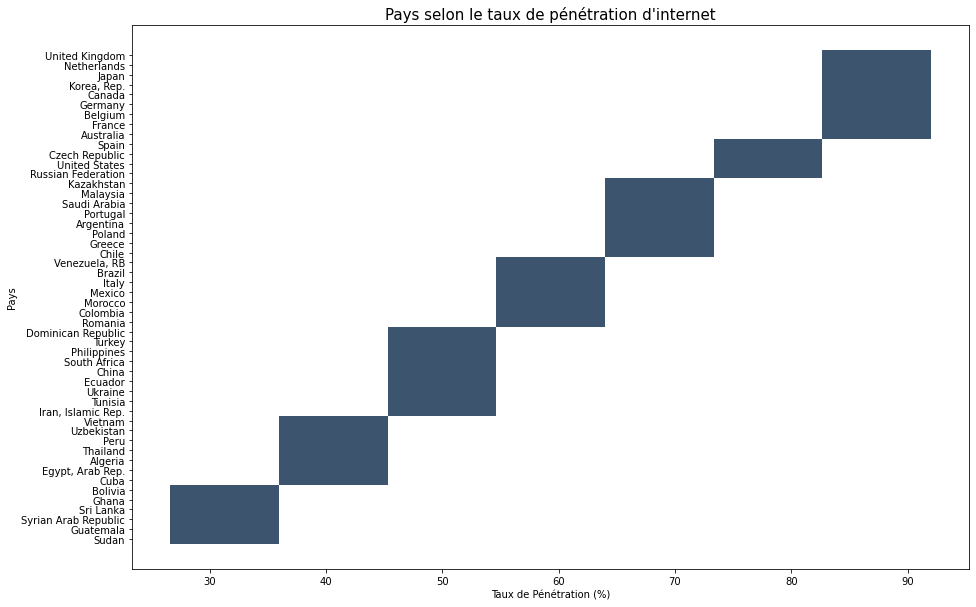

In [91]:
plt.figure(figsize=(15, 10))
plot = sns.histplot(x="Internet users",
                   y="Country Name",                    
                   data=Countrie_df[["Country Name", "Internet users"]].sort_values("Internet users", ascending=False).head(50)
)
plt.title("Pays selon le taux de pénétration d'internet", size=15)
plot.set(xlabel="Taux de Pénétration (%)", ylabel="Pays")
plt.rcParams["axes.labelsize"] = 10
plt.show()

Analysons les pays sélectionnés

In [92]:
POPULATION_15_14 = Countrie_df[["Country Name", "Ages 15-24 population"]].sort_values("Ages 15-24 population", ascending=False).head(10)

In [93]:
POPULATION_15_14

Country Name  Ages 15-24 population
86           India            244120201.0
39           China            197026759.0
202  United States             45147517.0
87       Indonesia             41819264.0
144       Pakistan             39080811.0
140        Nigeria             36659023.0
15      Bangladesh             34400594.0
26          Brazil             33595574.0
61        Ethiopia             21074230.0
124         Mexico             20336734.0

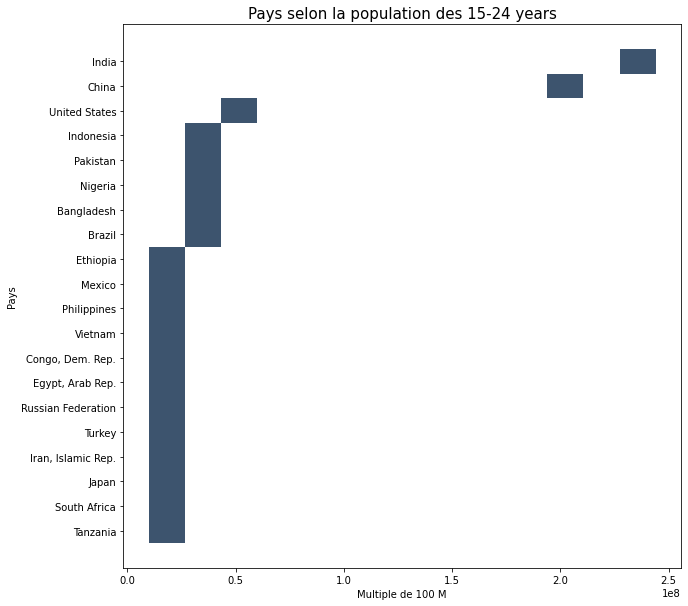

In [94]:
# Visualisation des pays avec une Forte population des 15-24 ans
plt.figure(figsize=(10, 10))
plot = sns.histplot(x="Ages 15-24 population", y="Country Name",                    
data=Countrie_df[["Country Name", "Ages 15-24 population"]].sort_values("Ages 15-24 population", ascending=False).head(20))
plt.title("Pays selon la population des 15-24 years", size=15)
plot.set(xlabel="Multiple de 100 M", ylabel="Pays")
plt.rcParams["axes.labelsize"] = 10
plt.show()

In [95]:
PIB = Countrie_df[["Country Name", "Gross domestic product per capita"]].sort_values("Gross domestic product per capita", ascending=False).head(10)


In [96]:
PIB

Country Name  Gross domestic product per capita
202   United States                       56469.008969
161    Saudi Arabia                       54118.737375
135     Netherlands                       50054.194363
70          Germany                       48170.263465
10        Australia                       46475.927752
18          Belgium                       45629.352069
34           Canada                       44204.946582
201  United Kingdom                       42124.651892
65           France                       41178.141819
95            Japan                       40686.024386

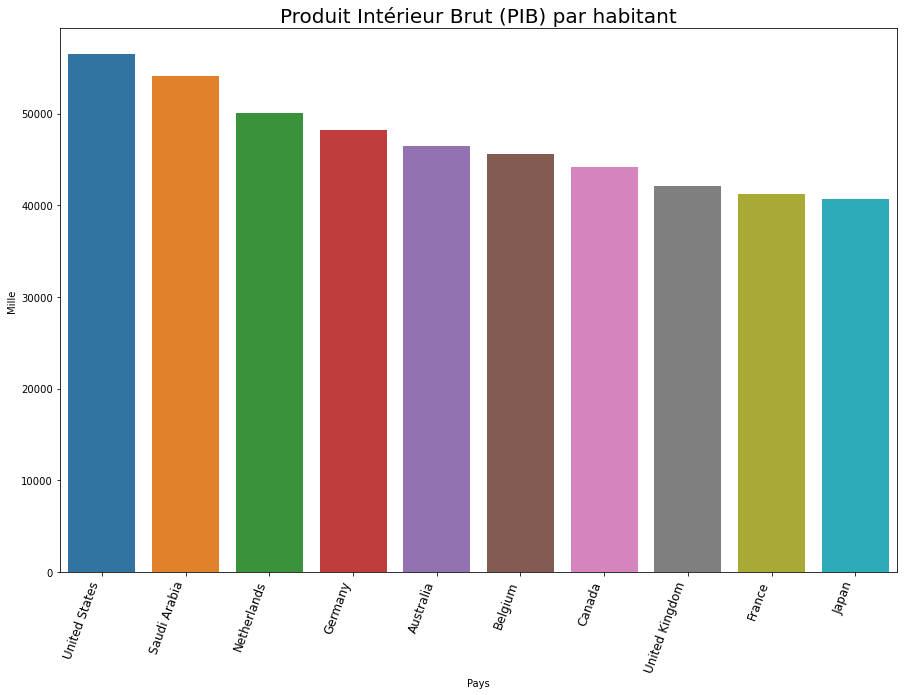

In [97]:
# Visualisons  des pays avec une PIB elevé
plt.figure(figsize=(15, 10))
plot = sns.barplot(x="Country Name", y="Gross domestic product per capita", data=PIB)
plt.title("Produit Intérieur Brut (PIB) par habitant", size=20)
plot.set_xticklabels(labels=PIB["Country Name"], rotation=70, size=12, horizontalalignment="right")
plot.set(xlabel="Pays", ylabel="Mille")
plt.show()

In [98]:
EDUCATION = Countrie_df[["Country Name", "Enrolment in tertiary education", "Enrolment in upper secondary education"]].copy(deep=True)
EDUCATION["Enrolment total"] = Countrie_df["Enrolment in upper secondary education"] + Countrie_df["Enrolment in tertiary education"]

In [99]:
EDUCATION = EDUCATION[["Country Name", "Enrolment total"]].sort_values("Enrolment total", ascending=False).head(10)
EDUCATION

Country Name  Enrolment total
86                India       87336096.0
39                China       87076616.0
202       United States       31268043.0
26               Brazil       18235058.0
87            Indonesia       15010659.0
194              Turkey       11058509.0
156  Russian Federation        9415420.0
88   Iran, Islamic Rep.        8494556.0
124              Mexico        8101727.0
15           Bangladesh        7853068.5

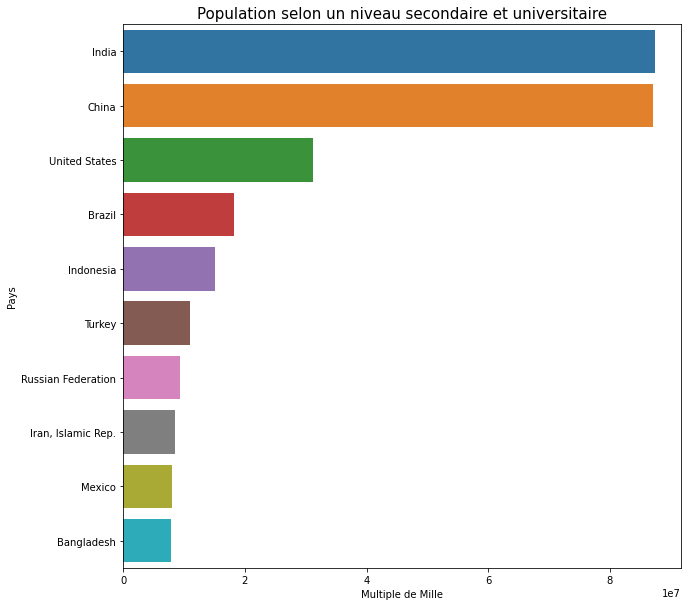

In [100]:
# Visualisons les pays selon un niveau secondaier et universitaire
plt.figure(figsize=(10, 10))
plot = sns.barplot(x="Enrolment total", y="Country Name",data=EDUCATION.sort_values("Enrolment total", ascending=False).head(20)
)
plt.title("Population selon un niveau secondaire et universitaire", size=15)
plot.set(xlabel="Multiple de Mille", ylabel="Pays")
plt.show()

Déterminons  le nombre de clients potentiels par pays

In [101]:
PotielClient_df = Countrie_df[["Country Name", "Internet users", "Enrolment in tertiary education", "Enrolment in upper secondary education"]].copy(deep=True)

In [102]:
PotielClient_df["Potential customers"] = (Countrie_df["Enrolment in upper secondary education"] + Countrie_df["Enrolment in tertiary education"])

In [103]:
PotielClient_df = PotielClient_df.sort_values("Potential customers", ascending=False).head(10)

In [104]:
PotielClient_df

Country Name  Internet users  Enrolment in tertiary education  \
86                India       26.000000                       32107420.0   
39                China       50.300000                       43367392.0   
202       United States       74.554202                       19531728.0   
26               Brazil       58.327952                        8285475.0   
87            Indonesia       21.976068                        5107999.0   
194              Turkey       53.744979                        6062886.0   
156  Russian Federation       73.410000                        6592416.0   
88   Iran, Islamic Rep.       45.334976                        4802721.0   
124              Mexico       57.431043                        3419391.0   
15           Bangladesh       14.400000                        2068355.0   

     Enrolment in upper secondary education  Potential customers  
86                               55228676.0           87336096.0  
39                               43709224.0           87076616.0  
202                              11736315.0           31268043.0  
26                                9949583.0           18235058.0  
87                                9902660.0           15010659.0  
194                               4995623.0           11058509.0  
156                               2823004.0            9415420.0  
88                                3691835.0            8494556.0  
124                               4682336.0            8101727.0  
15                                5784713.5            7853068.5

In [105]:
from pandas.api.types import CategoricalDtype
categorical_countries_order_by_potential_customer = CategoricalDtype(PotielClient_df["Country Name"], ordered=True)

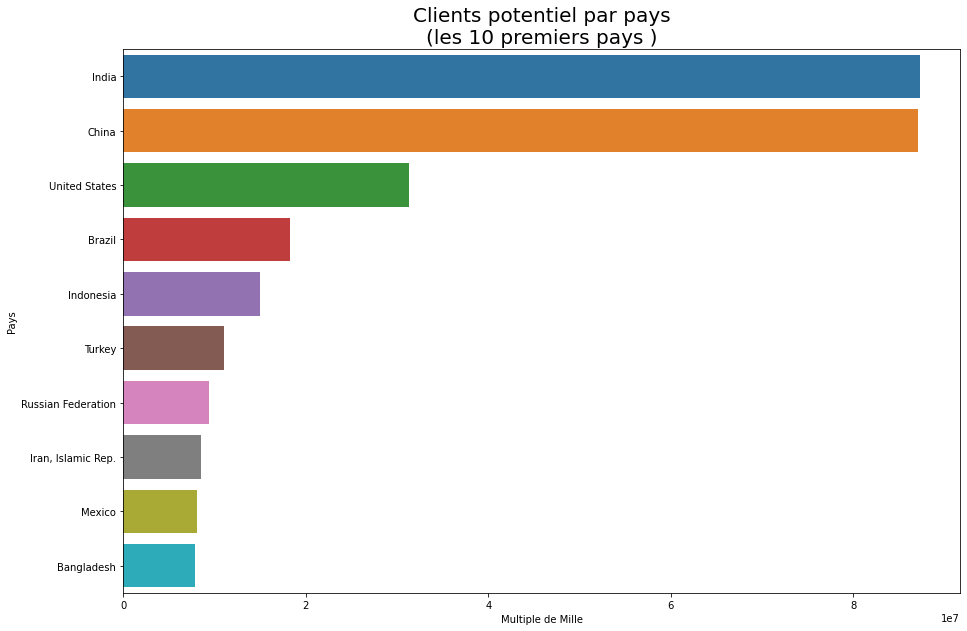

In [106]:
plt.figure(figsize=(15, 10))
plot = sns.barplot(x="Potential customers", y="Country Name", data=PotielClient_df)
plt.title("Clients potentiel par pays\n(les 10 premiers pays )", size=20)
plot.set(xlabel="Multiple de Mille", ylabel="Pays")
plt.show()



Suite à notre analyse nous pensons que la Start-up doit inverstir dans les pays suivant:
- Inde
- Chine 
- et Etats Unis. 